###**Project Statement – Walmart Case Study (Confidence Interval & CLT)**

###**SITUATION**
- Walmart, a global retail giant, aims to gain deeper insights into customer purchasing behavior during Black Friday.
- With a customer base exceeding 100 million (assumed 50 million male and 50 million female), the Walmart management team is interested in understanding whether spending patterns differ across customer demographics, particularly
    - Do women spend more than men on Black Friday?
    - Do spending habits vary based on marital status or age group?

###**TASK**
- Our Objective is to analyze Purchase patterns From the Black friday transactional dataset.
  -  Do women spend more per transaction than men?
  -  Do married customers spend more than unmarried Ones?
  -  Which age groups spend the most during black friday?
    To Answer these Questions:
     - Calculate Sample means for different customers groups.
     - Use the Central limit theorem to estimate population mean.
     - Construct Confidence interval ( 90%, 95%, 99%) for mean spending
     - Analyze whether Confidence Interval Overlap across groups.
     - Derive bussiness insights and make recommendations based on pattern findings.

###**ACTION**
- Data preparation:
  - Imported the dataset and check data structure, types, & missing values
  - Converted categorical variables to approriate formats
  - Handling Missing and detected outliers using boxplots and statistical Summaries.
- Exploratory data analysis (EDA):
  - Visualized distributions using histogram, countplots & Boxplots
  - Analyzed average purachse Behaviour for:
    - Gender ( Male Vs. Female)
    - Married vs. Unmarried
    - Age Bins (0-17, 18-30, 30-50)
- Confidence Interval estimation:
  - Drew random samples from each group (1000)
  - Applied the CLT to calculate the sample Distribution of the mean
  - Computed CI for population means at 90%, 95%, 99%
- Comparative analysis:
  - Checked if the CI's for different groups overlap
- Insights & Recommendations:
  - Summarized key finding into simple insights, actionable insights.

###**RESULT**
- Gender Analysis:
  - Women showed a slightly lesser average spend than men.
  - Married & unmarried customer purchases behaviour were similar.
  - Compared to all age group 36-45, 46-50 were purcahsing a lot, there avereage spening is highest.


###**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###**LOADING DATASET**

In [ ]:
df = pd.read_csv('walmart_data.txt')

###**PREVIEW THE DATASET**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


###**TAIL OF THE DATASET**

In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


###**DATASET**

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


###**SHAPE OF THE DATASET**

In [ ]:
df.shape

(550068, 10)

#Observation:
- The dataset contains 5,50,068 rows and 10 Features
- The dataset belongs to Walmart customer purcahses transactions

###**DATASET INFO**

In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#Observation:
- The dataset contains 10 features
- The features datatypes are int64, object
- The dataset contains Non-Null values
- The occupation should be in Object but given in int64 form
- The Maritual status should be in object but given in integer form

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#Observation:
- Target variable : Purchase
- we should find out Purchase patterns
- Gender, Age, occupation, City Category Maritual Status, product_category these features may influence purchase patterns

###**DATATYPES**

In [ ]:
# Dataset data types
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
# Converting Numerical into categorical variables
df['Occupation'] = df['Occupation'].astype('object')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('object')
df['Marital_Status'] = df['Marital_Status'].astype('object')

In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,object
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,object
Product_Category,int64
Purchase,int64


###**STATISTICAL SUMMARY**

In [ ]:
# Statistical summmary
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.000000,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,NaN,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,NaN,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,12054.000000


In [ ]:
df.describe()

,User_ID,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000
mean,1.003029e+06,5.404270,9263.968713
std,1.727592e+03,3.936211,5023.065394
min,1.000001e+06,1.000000,12.000000
25%,1.001516e+06,1.000000,5823.000000
50%,1.003077e+06,5.000000,8047.000000
75%,1.004478e+06,8.000000,12054.000000
max,1.006040e+06,20.000000,23961.000000


#Observation:
- The purchase column is the target variable
- The average customers spending is approx. 9000
- The Minimum customers spending is 12
- The maximum amount spending is 23000
- The 25% of the customers spending is approx. 6000
- The 50% of the customers spending is approx. 8000
- The 25% of the customers spending is approx. 12000
- Min = 12, Max = 23, mean = 9000
- Right-Skewed data

In [ ]:
df.describe(include = 'object')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
count,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2
top,P00265242,M,26-35,4,B,1,0
freq,1880,414259,219587,72308,231173,193821,324731


#Observation:
- Gender category has 2 categories Male and Female, Most frequent categories is Male and frequency is 414259
- Age column has 7 categories and the most frequent age is 26-35
- Occupation column has 21 unique categories and most repeated occupation code is 4
- City category column has 3 unique category and most common one is City B
- Marital status column has 2 categories, In that Unmarried are most common and unmarried are most frequent customers
  - 0 means Unmarried
  - 1 Means Married

##**Handling Null values**

In [ ]:
df.isnull().sum().sum()

np.int64(0)

##**Non Graphical Analysis**

In [ ]:
# Categories - value_counts()
# Numerics   - nunique()

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


###**Gender column**

In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


#Observation:
- In walmart dataset Contains the gender has 2 categories are Male and Female
- Male are doing many transactions in Walmart instead of Female
- Male customers are dominating more
- The Male customers are 4,14,259
- The Female customers are 1,35,809

###**Age**

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


#Observation:
- The Walmart dataset contains Age and it has 7 categories of Age group
- The Most frequent customers are from 26-35 Age group, Followed by 36-45 Age Group
- The least purcahse Age group is 0-17 Which are adult age group

###**Occupation**

In [ ]:
# Top 5 occupation codes
df['Occupation'].value_counts().head()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043


#Observation:
- The Occupation column has 21 unique codes in that occupation code 4 has the highest category, followed by code 4

###**City Category**

In [ ]:
df['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


#Observation
- The city category column has 3 different cities are A, B and C
- The Higher number of customers are from City Categories B, Followed by City C
- The least number of customers are from City Category A.

###**Stay_In_Current_City_Years**

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


#Observation:
- The Higher number of customers are staying only 1 year, Followed and 2 years
- The least customers are staying in city is Less than 1 Month

###**Marital Status**

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


#Obseration
- The marital status has 2 binary categories are
- 0 means Unmarried, 1 means Married
- The highest number of customers are Unmarried, and Lowest customers are Married

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


##**Univariate Analysis**

In [ ]:
# Univariate means Single variables
# Categorical variable  - Countplot
# Numerical Variables   - HistPlot, Kde plot
# Box PLot

<Axes: xlabel='Marital_Status', ylabel='count'>

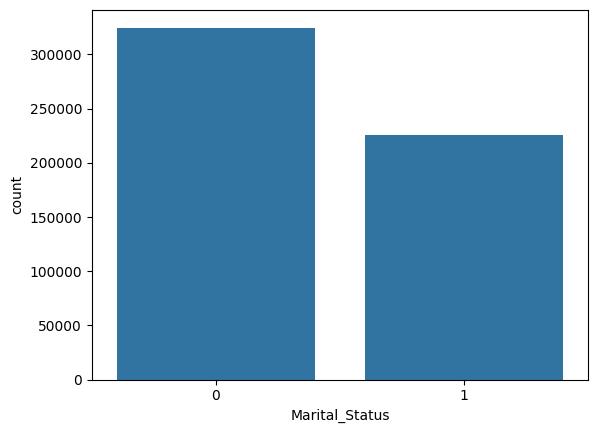

In [ ]:
sns.countplot(x = df['Marital_Status'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

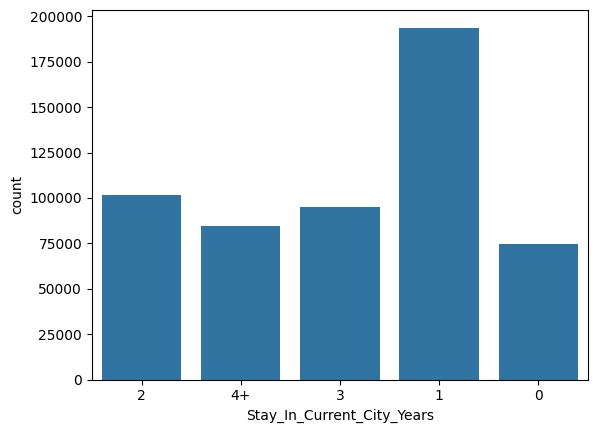

In [ ]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: xlabel='City_Category', ylabel='count'>

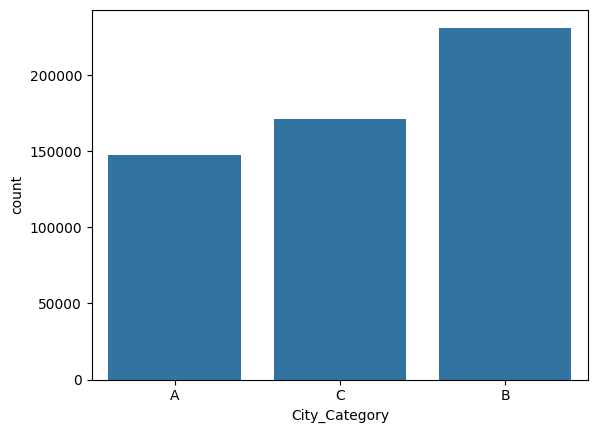

In [ ]:
sns.countplot(x = df['City_Category'])

<Axes: xlabel='Occupation', ylabel='count'>

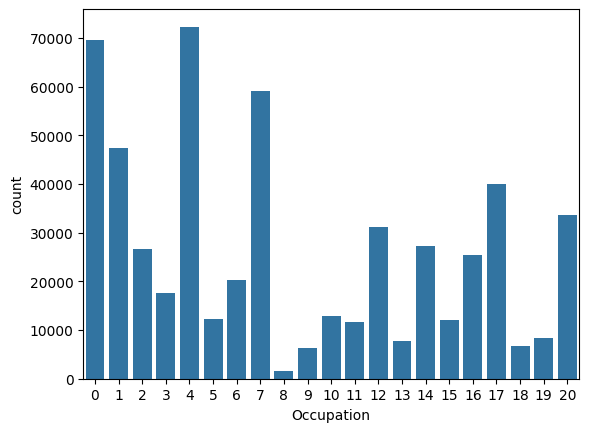

In [ ]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Age', ylabel='count'>

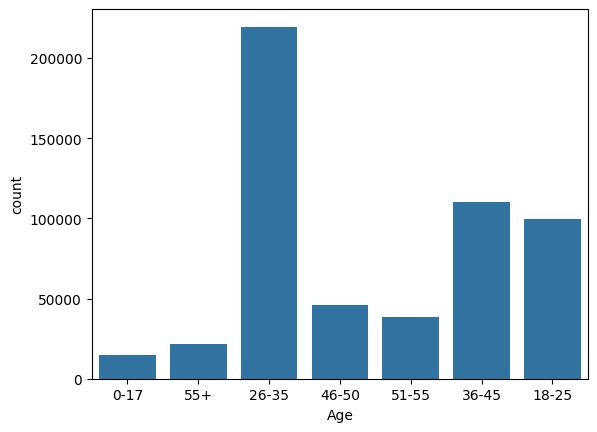

In [ ]:
sns.countplot(x = df['Age'])

<Axes: xlabel='Gender', ylabel='count'>

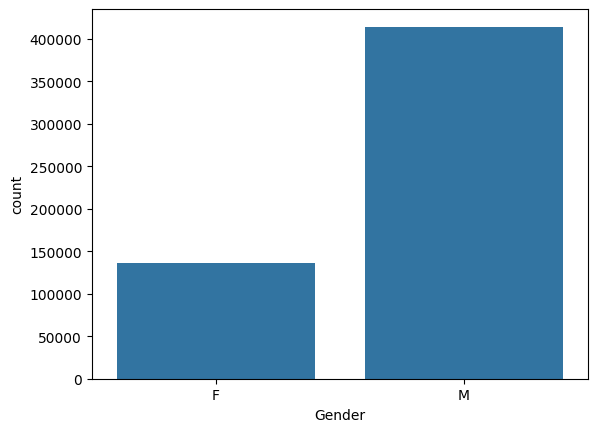

In [ ]:
sns.countplot(x = df['Gender'])

<Axes: xlabel='Purchase', ylabel='Count'>

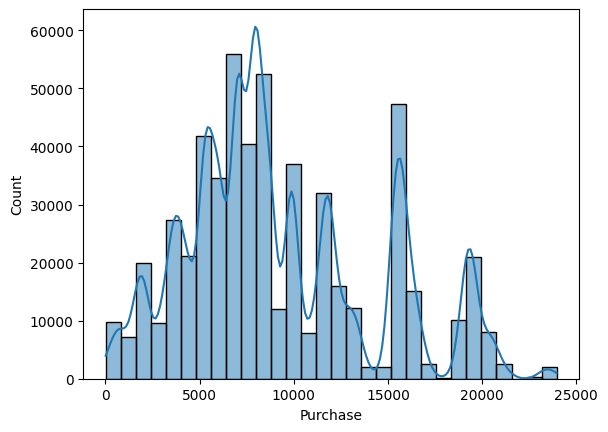

In [ ]:
sns.histplot(df['Purchase'], bins = 30, kde = True)

##**Bi variate Analysis**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Gender', ylabel='Purchase'>

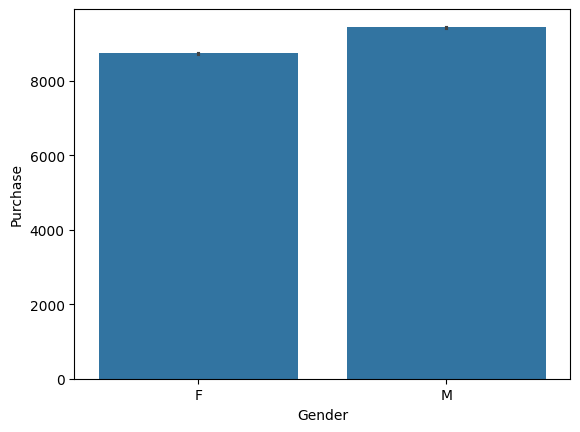

In [ ]:
# Gender vs. Purchase
# Category vs. Numerical
sns.barplot(x = 'Gender', y = 'Purchase', data = df)

<Axes: xlabel='Gender', ylabel='Purchase'>

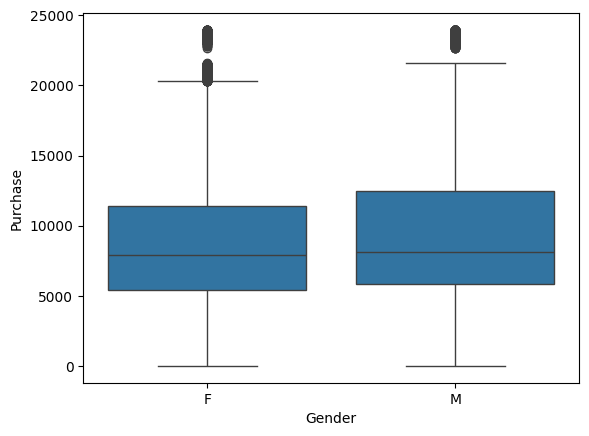

In [ ]:
# Boxplot
# Gender vs. purchase
sns.boxplot(x = 'Gender', y = 'Purchase', data = df)

#Observation:
- Both Genders having Outliers.
- In this plot Higher median = Higher spending
- The Medians of Male and Female Spending is equal while looking at plot.
- But even though The Median Purchase spending for male is slightly higher than Female
- The taller box means more variablity in spending
- Noth genders have similar IQR, but male seems to have slightly higher range.

<Axes: xlabel='Age', ylabel='Purchase'>

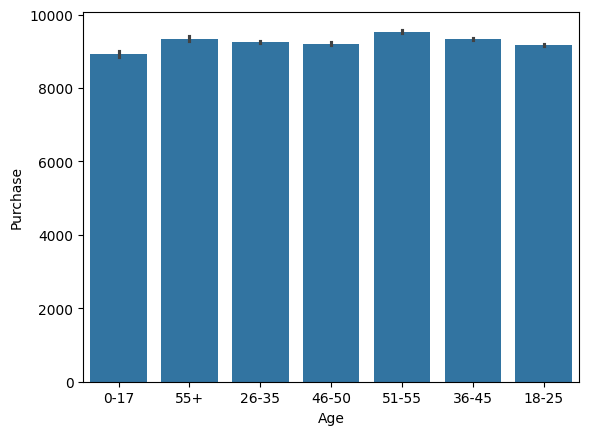

In [ ]:
# Age vs. Purchase
sns.barplot(x = 'Age', y = 'Purchase', data = df)

#Observation:
- All age groups have outliers I will go with boxplot.

<Axes: xlabel='Age', ylabel='Purchase'>

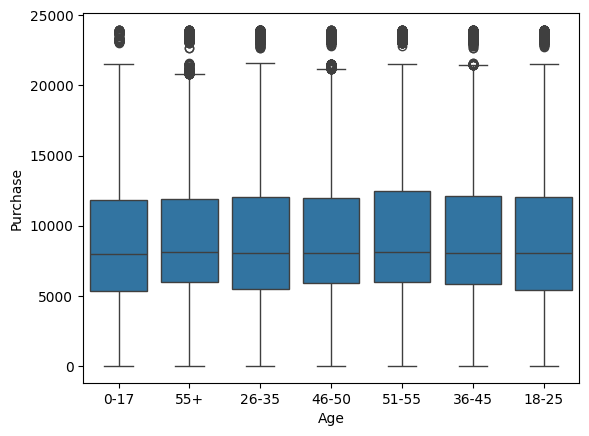

In [ ]:
# Age vs. Purchase
sns.boxplot(x = 'Age', y = 'Purchase', data = df)

#Observation:
- All age groups have outliers
- All age groups having same median
- In this plot, Finding Top purchasing patterns between Age groups is not possible


<Axes: xlabel='Marital_Status', ylabel='Purchase'>

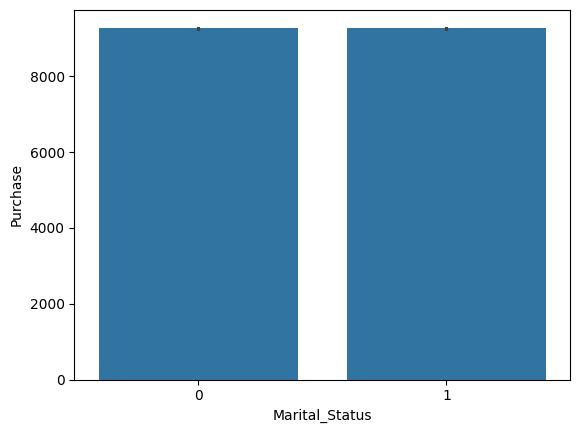

In [ ]:
# Marital_Status vs. Purchase
sns.barplot(x = 'Marital_Status', y ='Purchase', data = df)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

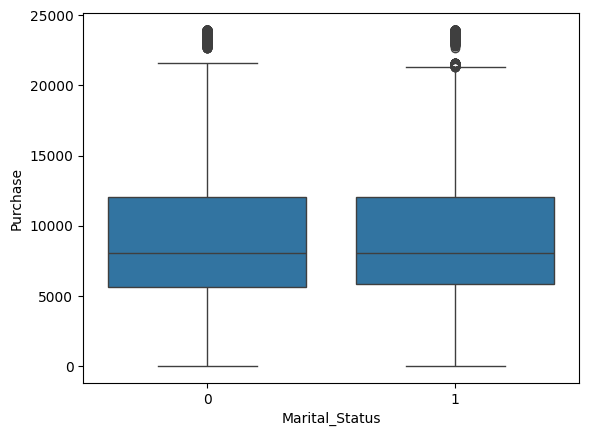

In [ ]:
sns.boxplot(x = 'Marital_Status', y ='Purchase', data = df)

#Observations:
- Unmarried and married customers spending having outliers
- The medians are same
- Impossible to decide higher spenders.

<Axes: xlabel='City_Category', ylabel='Purchase'>

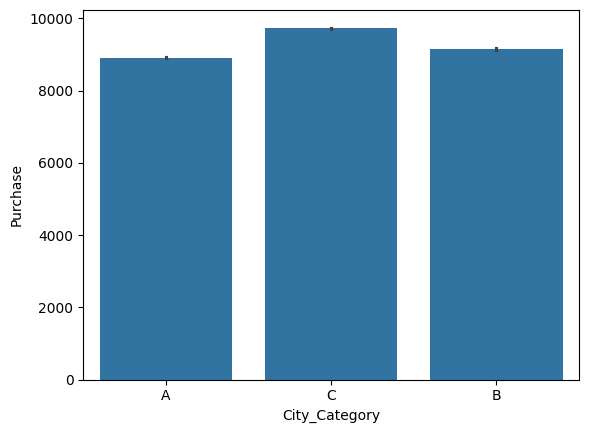

In [ ]:
# City_Category vs. Purchase
sns.barplot(x = 'City_Category',y = 'Purchase', data = df)

<Axes: xlabel='City_Category', ylabel='Purchase'>

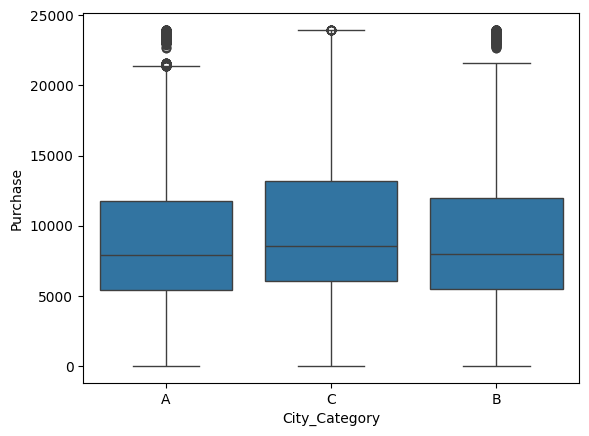

In [ ]:
sns.boxplot(x = 'City_Category',y = 'Purchase', data = df)

#Observations
- Outliers are present
- But visually City c has the highest customers spenders

###**Multi variate Analysis**

In [ ]:
# 3 variables
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Age', ylabel='Purchase'>

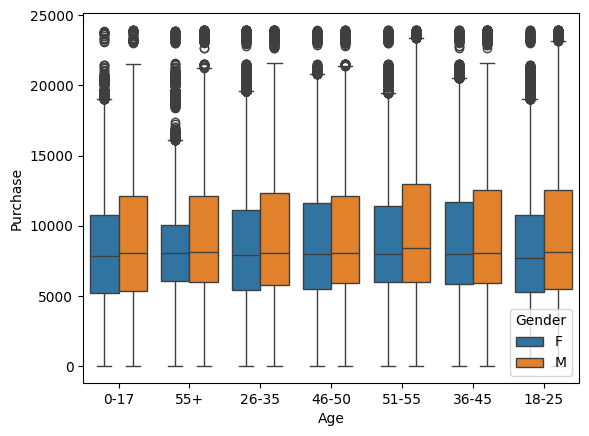

In [ ]:
# Gender vs. Age vs. Purchase
sns.boxplot(x = 'Age', y = 'Purchase', hue = 'Gender', data = df)

#Observation:
- Outliers are present
- All age Groups which are related to Male customers their Median is same
- All age Groups which are related to female customers their Median is same
- While using Multivariate analysis it impossible to find top.

<Axes: xlabel='Age', ylabel='Purchase'>

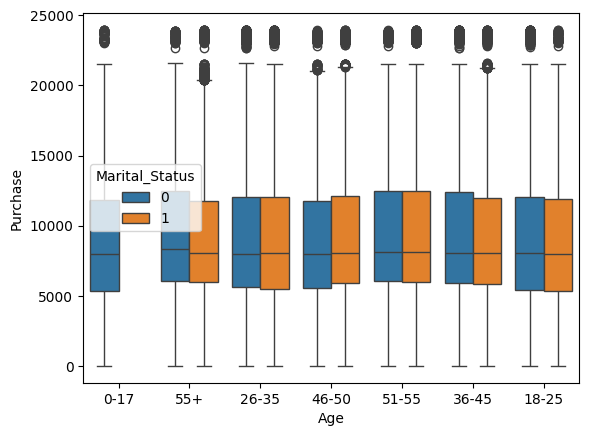

In [ ]:
# Age vs. Purchase vs. Marital_status
sns.boxplot(x = 'Age', y = 'Purchase', hue = 'Marital_Status', data = df)

#Observation:
- Outliers are present in all groups
- Age group of Unmarried Customers whose median is same.
-  Age group of married Customers whose median is same.
- Impossible to find Top by using multivariate analysis

#Observation
- When ever we are using Visualization It gives basic visualization of the data.
- It creates doubt regarding variation between two varaibles.
- By using visualization it gives only a hint or clue regarding variation
- But Visually It don't tell about exact variation.

###**STATISTICAL ANALYSIS**
- **Walmart has millions of customers, It's impossible to study each one individually**
  - **Take a sample ( A small portion of the data)**
  - **Analyze it using statistical methods and draw conclusions about the whole population.**
  - **Walmart can compare Male and Female spending**
  - **Understand Which age group are spending more**
  - **Analyze customer behaviour to plan marketing, Offers, and Inventory.**

###**WHY STATISTICAL ANALYSIS IS IMPORTANT?**
- Visualizations Like boxplot or barplot are great for exploring data visually.
- But they often don't tell us whether a pattern is significantly.

###**CLT**
- When you take many random samples from any population, the distribution, of their sample means will approximate a normal distribution, regardless of the population's actual distribution.

###**CLT FOR MALE PURCHASES**

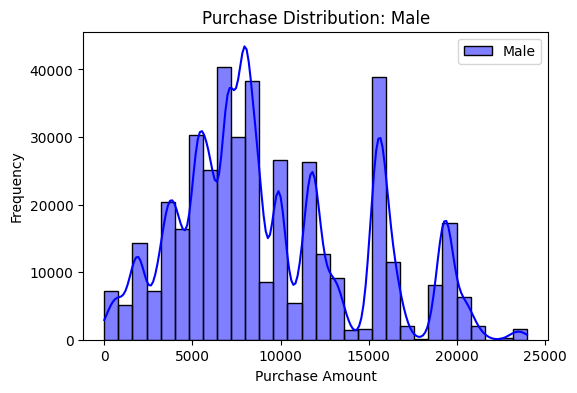

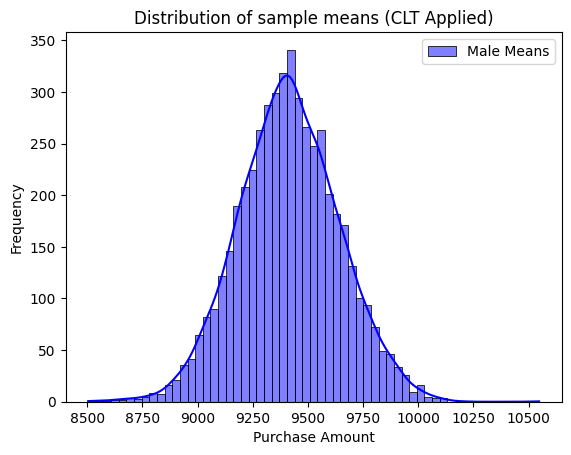

In [ ]:
male_purchase = df[df['Gender'] == 'M']['Purchase']

plt.figure(figsize = (6,4))
sns.histplot(male_purchase, color = 'blue', bins = 30, label = 'Male', kde = True)
plt.title("Purchase Distribution: Male")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

sample_male = male_purchase.sample(n = 5000, replace = True)

male_means = []
for i in range(5000):
  sample_m = sample_male.sample(n = 500, replace = True)
  male_means.append(sample_m.mean())

sns.histplot(male_means, kde = True, color = 'blue', label = 'Male Means')
plt.title("Distribution of sample means (CLT Applied)")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

###**CLT FOR FEMALE PURCHASES**

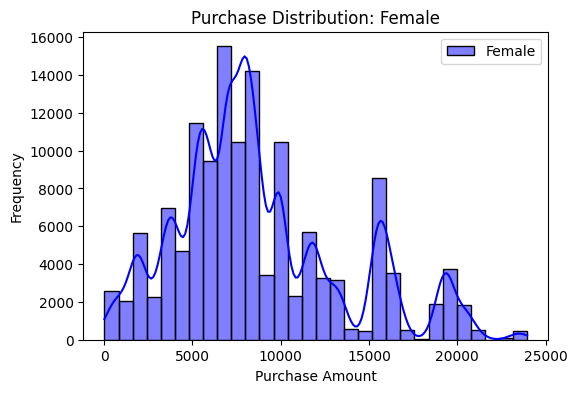

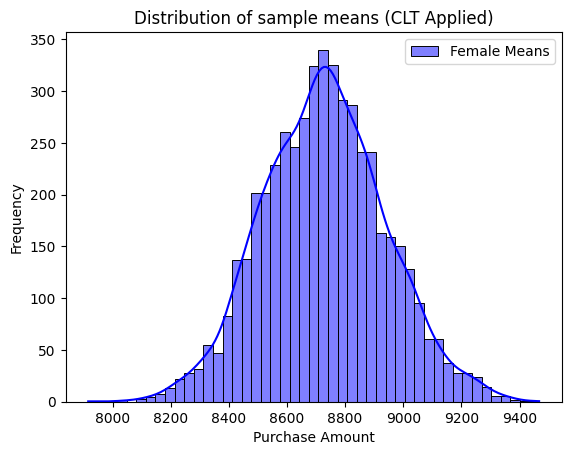

In [ ]:
female_purchase = df[df['Gender'] == 'F']['Purchase']

plt.figure(figsize = (6,4))
sns.histplot(female_purchase, color = 'blue', bins = 30, label = 'Female', kde = True)
plt.title("Purchase Distribution: Female")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

sample_female = female_purchase.sample(n = 5000, replace = True)

female_means = []
for i in range(5000):
  sample_f = sample_female.sample(n = 500, replace = True)
  female_means.append(sample_f.mean())

sns.histplot(female_means, kde = True, color = 'blue', label = 'Female Means')
plt.title("Distribution of sample means (CLT Applied)")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

###**CALCULATING CI USING CLT FOR MALE PURCHASES**

In [ ]:
from scipy.stats import norm

In [ ]:
np.random.seed(42)
sample_size = 5000
male_sample = np.random.choice(male_purchase, size = sample_size, replace = True)
mean = np.mean(male_sample)
standard_deviation = np.std(male_sample, ddof = 1)
confidence_level = 0.95
n = len(male_sample)
standard_error = standard_deviation/np.sqrt(n)
alpha = 0.05
z = abs(norm.ppf(alpha/2))
Margin_of_error = z * standard_error
lower_bound = mean - Margin_of_error
upper_bound = mean + Margin_of_error
print(f"Mean: {mean:.2f}")
print(f"standard_deviation: {standard_deviation:.2f}")
print(f"Standard error: {standard_error:.2f}")
print(f"Z-Score: {z:.2f}")
print(f"Margin Of error : {Margin_of_error}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Mean: 9484.52
standard_deviation: 5148.86
Standard error: 72.82
Z-Score: 1.96
Margin Of error : 142.71641126313406
95% Confidence Interval: (9341.81, 9627.24)


#Observation:
- The average male purchase amount in the sample is approximately 9484.52
- The standard deviation is quite large, there is a wide variation in individual purchase amount.
- The standard error of the mean is 72.82.
- Using a 95% Confidence level, the Z-score is 1.96 giving a margin of error is 142.716
- So we are 95% Confident that the true average male purchase lies between Rupees 9341 and Ruppes 9627.

###**EASY METHOD**

In [ ]:
# Calculating CI
# Confidence = 90%
# Loc means location = Mean
# Scale = Standard Error = std/sqrt(n)
from scipy.stats import norm
norm.interval(confidence = 0.90,loc = 9484.52, scale = 72.82)

(np.float64(9364.741758885395), np.float64(9604.298241114606))

In [ ]:
# Calculating CI
# Confidence = 95%
# Loc means location = Mean
# Scale = Standard Error = std/sqrt(n)
from scipy.stats import norm
norm.interval(confidence = 0.95,loc = 9484.52, scale = 72.82)

(np.float64(9341.795422645793), np.float64(9627.244577354208))

In [ ]:
# Calculating CI
# Confidence = 99%
# Loc means location = Mean
# Scale = Standard Error = std/sqrt(n)
from scipy.stats import norm
norm.interval(confidence = 0.99,loc = 9484.52, scale = 72.82)

(np.float64(9296.948110115569), np.float64(9672.091889884432))

###**CALCULATING CI USING CLT FOR FEMALE PURCHASES**

In [ ]:
np.random.seed(42)
sample_size = 5000
male_sample = np.random.choice(female_purchase, size = sample_size, replace = True)
mean = np.mean(male_sample)
standard_deviation = np.std(male_sample, ddof = 1)
confidence_level = 0.95
n = len(male_sample)
standard_error = standard_deviation/np.sqrt(n)
alpha = 0.05
z = abs(norm.ppf(alpha/2))
Margin_of_error = z * standard_error
lower_bound = mean - Margin_of_error
upper_bound = mean + Margin_of_error
print(f"Mean: {mean:.2f}")
print(f"standard_deviation: {standard_deviation:.2f}")
print(f"Standard error: {standard_error:.2f}")
print(f"Z-Score: {z:.2f}")
print(f"Margin Of error : {Margin_of_error}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Mean: 8858.47
standard_deviation: 4900.94
Standard error: 69.31
Z-Score: 1.96
Margin Of error : 135.8447001031045
95% Confidence Interval: (8722.63, 8994.32)


#Observation:
- The average spending in the sample is ₹8,858.47.
- We are 95% confident that the real average spending is between ₹8,722.63 and ₹8,994.32.
- The difference is around ₹135.84, showing the estimate is quite reliable.
- Because we used np.random.seed(42), we will get the same result every time we run the code.
- A large sample size (5,000) helps in making the average more accurate and stable.

#Final Conclusion:
- The average male purchase amount (₹9484.52) is clearly higher than the average female purchase amount (₹8858.47).
- The confidence intervals do not overlap, indicating a statistically significant difference.
- This strongly suggests that men tend to spend more than women in this dataset.

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


###**CLT FOR MARRIED PURCHASES**

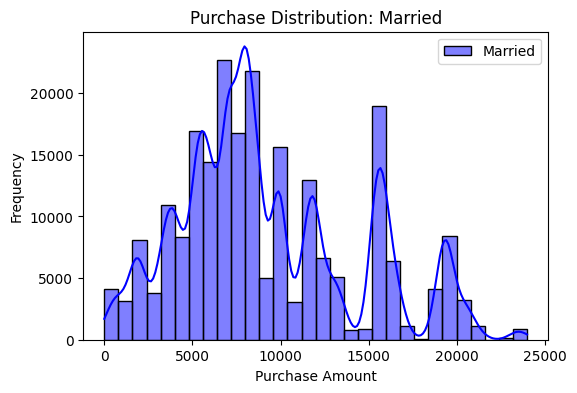

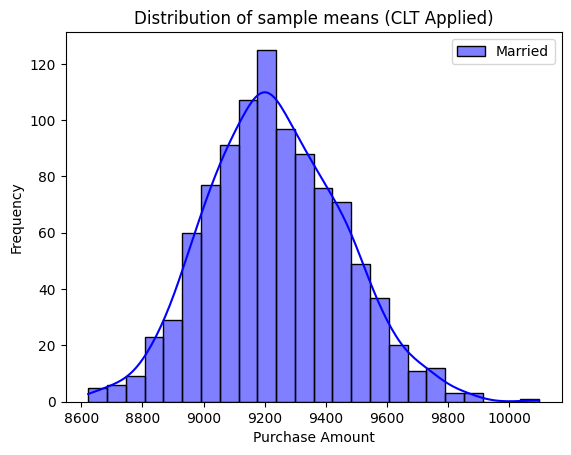

In [ ]:
married_purchase = df[df['Marital_Status'] == 1]['Purchase']

plt.figure(figsize = (6,4))
sns.histplot(married_purchase, color = 'blue', bins = 30, label = 'Married', kde = True)
plt.title("Purchase Distribution: Married")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

sample_married = married_purchase.sample(n = 5000, replace = True)

married_means = []
for i in range(1000):
  sample_m = sample_married.sample(n = 500, replace = True)
  married_means.append(sample_m.mean())

sns.histplot(married_means, kde = True, color = 'blue', label = 'Married')
plt.title("Distribution of sample means (CLT Applied)")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

###**CLT FOR UNMARRIED PURCHASES**

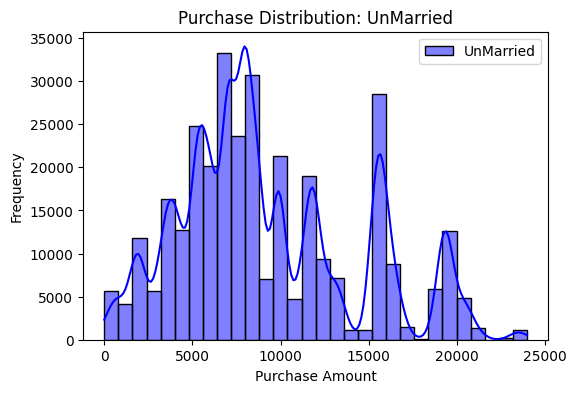

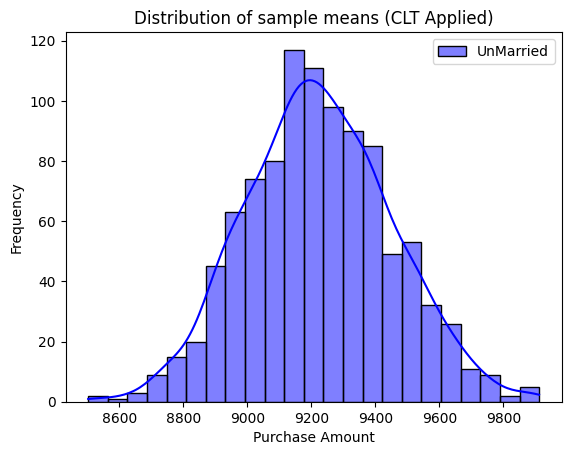

In [ ]:
unmarried_purchase = df[df['Marital_Status'] == 0]['Purchase']

plt.figure(figsize = (6,4))
sns.histplot(unmarried_purchase, color = 'blue', bins = 30, label = 'UnMarried', kde = True)
plt.title("Purchase Distribution: UnMarried")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

sample_unmarried = unmarried_purchase.sample(n = 5000, replace = True)

unmarried_means = []
for i in range(1000):
  sample_um = sample_unmarried.sample(n = 500, replace = True)
  unmarried_means.append(sample_um.mean())

sns.histplot(unmarried_means, kde = True, color = 'blue', label = 'UnMarried')
plt.title("Distribution of sample means (CLT Applied)")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

###**CI USING CLT FOR MARRIED CUSTOMERS PURCHASES**

In [ ]:
np.random.seed(42)
sample_size = 1000
married_sample = np.random.choice(married_purchase, size = sample_size, replace = True)
mean = np.mean(married_sample)
standard_deviation = np.std(married_sample, ddof = 1)
confidence_level = 0.95
n = len(married_sample)
standard_error = standard_deviation/np.sqrt(n)
alpha = 0.05
z = abs(norm.ppf(alpha/2))
Margin_of_error = z * standard_error
lower_bound = mean - Margin_of_error
upper_bound = mean + Margin_of_error
print(f"Mean: {mean:.2f}")
print(f"standard_deviation: {standard_deviation:.2f}")
print(f"Standard error: {standard_error:.2f}")
print(f"Z-Score: {z:.2f}")
print(f"Margin Of error : {Margin_of_error}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Mean: 9272.59
standard_deviation: 5000.59
Standard error: 158.13
Z-Score: 1.96
Margin Of error : 309.9338901399355
95% Confidence Interval: (8962.66, 9582.52)


###**CI USING CLT FOR UNMARRIED CUSTOMERS PURCHASES**

In [ ]:
np.random.seed(42)
sample_size = 1000
unmarried_sample = np.random.choice(unmarried_purchase, size = sample_size, replace = True)
mean = np.mean(unmarried_sample)
standard_deviation = np.std(unmarried_sample, ddof = 1)
confidence_level = 0.95
n = len(unmarried_sample)
standard_error = standard_deviation/np.sqrt(n)
alpha = 0.05
z = abs(norm.ppf(alpha/2))
Margin_of_error = z * standard_error
lower_bound = mean - Margin_of_error
upper_bound = mean + Margin_of_error
print(f"Mean: {mean:.2f}")
print(f"standard_deviation: {standard_deviation:.2f}")
print(f"Standard error: {standard_error:.2f}")
print(f"Z-Score: {z:.2f}")
print(f"Margin Of error : {Margin_of_error}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Mean: 9126.94
standard_deviation: 4943.08
Standard error: 156.31
Z-Score: 1.96
Margin Of error : 306.36951064402695
95% Confidence Interval: (8820.57, 9433.31)


#Observation:
- The confidence intervals for married purchases & Unmarried purchases are Overlapping
- For this, we cannot find the proper conclusion
- So by doing T-test is an Option to draw conclusions.

###**TWO SAMPLE Z-TEST**

In [ ]:
from statsmodels.stats.weightstats import ztest

z_stat, p_value = ztest(married_purchase, unmarried_purchase, value = 0, alternative = "two-sided")

print(f"t-statistics: {z_stat:.2f}")
print(f"p_value: {p_value:.2f}")

alpha = 0.05
if p_value < alpha:
  print("Reject the Null Hypothesis: There is a significant difference in purchase Behaviour")
else:
  print("Fail to Reject the Null Hypothesis: There is a No significant difference in purchase Behaviour")


t-statistics: -0.34
p_value: 0.73
Fail to Reject the Null Hypothesis: There is a No significant difference in purchase Behaviour


###**TWO-SAMPLE T-TEST**
- **NULL-Hypothesis:** Mean(Married Purchases) == Mean(Unmarried Purchases)
- **Alternative Hypothesis:** Mean(Married Purchases) <> Mean(Unmarried Purchases)

In [ ]:
from scipy import stats

#Perform a 2 - sample Independent T-test
t_stats, p_value = stats.ttest_ind(married_purchase, unmarried_purchase, equal_var = False)

print(f"t-statistics: {t_stats:.2f}")
print(f"p_value: {p_value:.2f}")

alpha = 0.05
if p_value < alpha:
  print("Reject the Null Hypothesis: There is a significant difference in purchase Behaviour")
else:
  print("Fail to Reject the Null Hypothesis: There is a No significant difference in purchase Behaviour")

t-statistics: -0.34
p_value: 0.73
Fail to Reject the Null Hypothesis: There is a No significant difference in purchase Behaviour


#Final Observation:
- Since p_value > 0.05, we fail to reject the Null hypothesis.
- This mean there is no statistically significant difference in the average Purchases made by Married Vs. Unmarried

###**AGE GROUP BASED CI ANALYSIS**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
df['Age'].max(), df['Age'].min()

('55+', '0-17')

In [ ]:
age_labels = {
    '0-17': 'Teenagers',
    '18-25' : 'Youngsters',
    '26-35' : 'Youngsters',
    '36-45' : 'Seniors',
    '46-50' : 'Seniors',
    '51-55' : 'Seniors',
     "55+"  : 'Seniors'
    }
df['age_group'] = df['Age'].map(age_labels)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,age_group
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Teenagers
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Teenagers
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Teenagers
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Teenagers
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Seniors


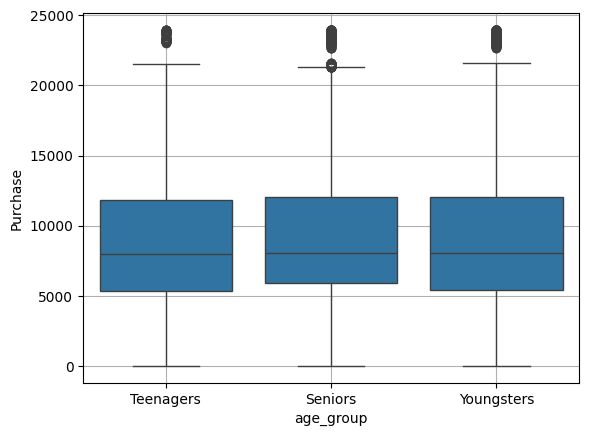

In [ ]:
sns.boxplot(data = df, x = 'age_group', y = 'Purchase')
plt.grid(True)

###**CLT FOR TEENAGERS PURCHASES**

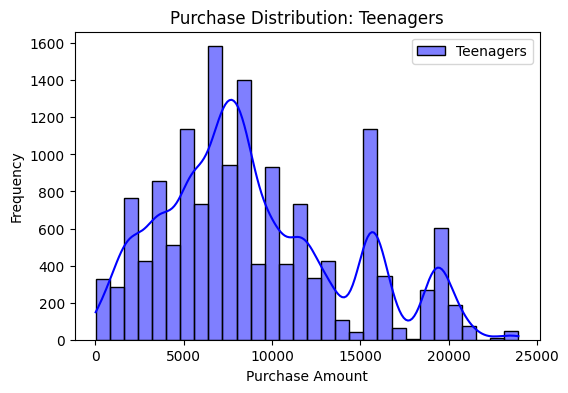

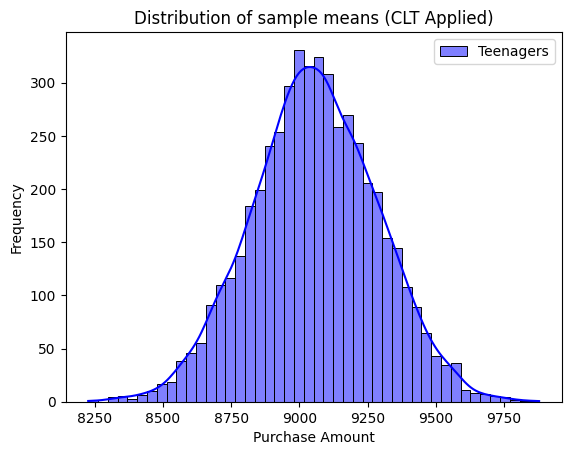

In [ ]:
teens_purchase = df[df['age_group'] == 'Teenagers']['Purchase']

plt.figure(figsize = (6,4))
sns.histplot(teens_purchase, color = 'blue', bins = 30, label = 'Teenagers', kde = True)
plt.title("Purchase Distribution: Teenagers")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

sample_teens = teens_purchase.sample(n = 5000, replace = True)

teens_means = []
for i in range(5000):
  sample_t = sample_teens.sample(n = 500, replace = True)
  teens_means.append(sample_t.mean())

sns.histplot(teens_means, kde = True, color = 'blue', label = 'Teenagers')
plt.title("Distribution of sample means (CLT Applied)")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

###**CLT FOR YOUNGSTERS PURCHASE**

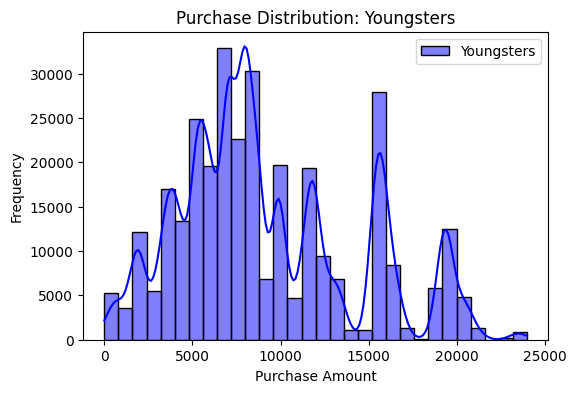

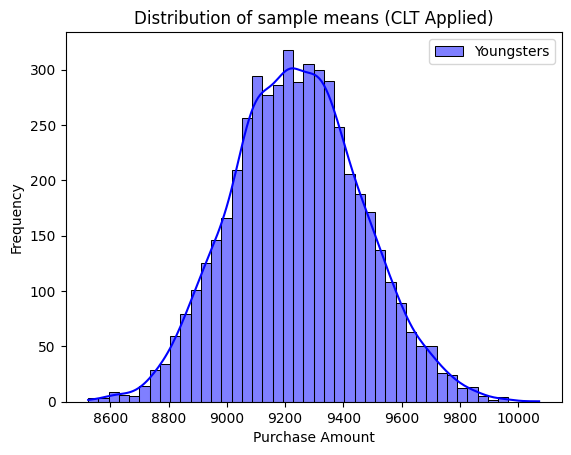

In [ ]:
young_purchase = df[df['age_group'] == 'Youngsters']['Purchase']

plt.figure(figsize = (6,4))
sns.histplot(young_purchase, color = 'blue', bins = 30, label = 'Youngsters', kde = True)
plt.title("Purchase Distribution: Youngsters")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

sample_young = young_purchase.sample(n = 5000, replace = True)

young_means = []
for i in range(5000):
  sample_y = sample_young.sample(n = 500, replace = True)
  young_means.append(sample_y.mean())

sns.histplot(young_means, kde = True, color = 'blue', label = 'Youngsters')
plt.title("Distribution of sample means (CLT Applied)")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

###**CLT FOR SENIORS PURCHASES**

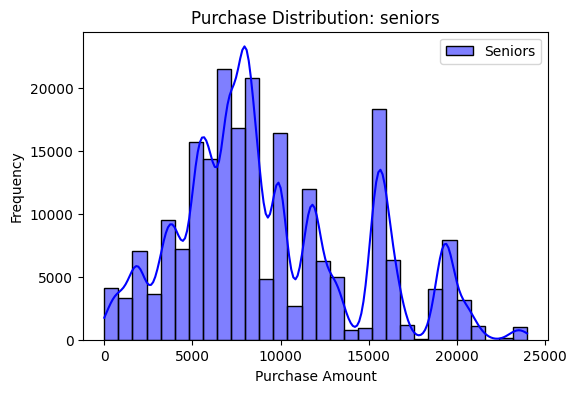

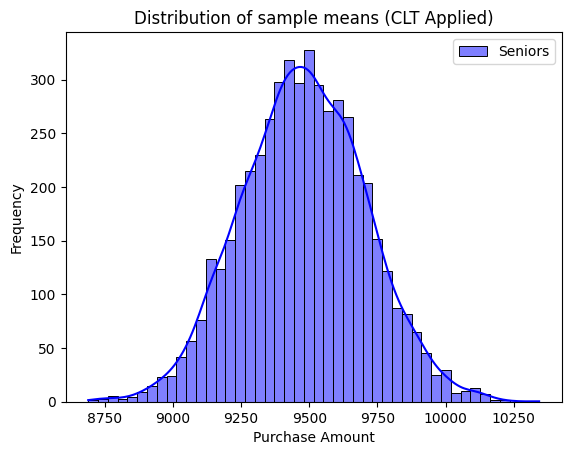

In [ ]:
seniors_purchase = df[df['age_group'] == 'Seniors']['Purchase']

plt.figure(figsize = (6,4))
sns.histplot(seniors_purchase, color = 'blue', bins = 30, label = 'Seniors', kde = True)
plt.title("Purchase Distribution: seniors")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

sample_seniors = seniors_purchase.sample(n = 5000, replace = True)

seniors_means = []
for i in range(5000):
  sample_s = sample_seniors.sample(n = 500, replace = True)
  seniors_means.append(sample_s.mean())

sns.histplot(seniors_means, kde = True, color = 'blue', label = 'Seniors')
plt.title("Distribution of sample means (CLT Applied)")
plt.xlabel('Purchase Amount')
plt.ylabel("Frequency")
plt.legend()
plt.show()

###**CI USING CLT FOR TEENAGERS PURCHASES**

In [ ]:
np.random.seed(42)
sample_size = 1000
teens_sample = np.random.choice(teens_purchase, size = sample_size, replace = True)
mean = np.mean(teens_sample)
standard_deviation = np.std(teens_sample, ddof = 1)
confidence_level = 0.95
n = len(teens_sample)
standard_error = standard_deviation/np.sqrt(n)
alpha = 0.05
z = abs(norm.ppf(alpha/2))
Margin_of_error = z * standard_error
lower_bound = mean - Margin_of_error
upper_bound = mean + Margin_of_error
print(f"Mean: {mean:.2f}")
print(f"standard_deviation: {standard_deviation:.2f}")
print(f"Standard error: {standard_error:.2f}")
print(f"Z-Score: {z:.2f}")
print(f"Margin Of error : {Margin_of_error}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Mean: 8964.48
standard_deviation: 4992.48
Standard error: 157.88
Z-Score: 1.96
Margin Of error : 309.43167161841177
95% Confidence Interval: (8655.05, 9273.91)


###**CI USING CLT FOR YOUNGSTERS PURCHASES**

In [ ]:
np.random.seed(42)
sample_size = 1000
young_sample = np.random.choice(young_purchase, size = sample_size, replace = True)
mean = np.mean(young_sample)
standard_deviation = np.std(young_sample, ddof = 1)
confidence_level = 0.95
n = len(young_sample)
standard_error = standard_deviation/np.sqrt(n)
alpha = 0.05
z = abs(norm.ppf(alpha/2))
Margin_of_error = z * standard_error
lower_bound = mean - Margin_of_error
upper_bound = mean + Margin_of_error
print(f"Mean: {mean:.2f}")
print(f"standard_deviation: {standard_deviation:.2f}")
print(f"Standard error: {standard_error:.2f}")
print(f"Z-Score: {z:.2f}")
print(f"Margin Of error : {Margin_of_error}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Mean: 9183.56
standard_deviation: 4908.50
Standard error: 155.22
Z-Score: 1.96
Margin Of error : 304.2265463701951
95% Confidence Interval: (8879.33, 9487.79)


###**CI USING CLT FOR SENIORS PURCHASES**

In [ ]:
np.random.seed(42)
sample_size = 1000
seniors_sample = np.random.choice(seniors_purchase, size = sample_size, replace = True)
mean = np.mean(seniors_sample)
standard_deviation = np.std(seniors_sample, ddof = 1)
confidence_level = 0.95
n = len(seniors_sample)
standard_error = standard_deviation/np.sqrt(n)
alpha = 0.05
z = abs(norm.ppf(alpha/2))
Margin_of_error = z * standard_error
lower_bound = mean - Margin_of_error
upper_bound = mean + Margin_of_error
print(f"Mean: {mean:.2f}")
print(f"standard_deviation: {standard_deviation:.2f}")
print(f"Standard error: {standard_error:.2f}")
print(f"Z-Score: {z:.2f}")
print(f"Margin Of error : {Margin_of_error}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Mean: 9252.03
standard_deviation: 5026.38
Standard error: 158.95
Z-Score: 1.96
Margin Of error : 311.53247277905973
95% Confidence Interval: (8940.50, 9563.56)


###**T-TEST FOR YOUNSTERS VS. SENIORS**

In [ ]:
from scipy import stats

#Perform a 2 - sample Independent T-test
t_stats, p_value = stats.ttest_ind(young_purchase, seniors_purchase, equal_var = False)

print(f"t-statistics: {t_stats:.2f}")
print(f"p_value: {p_value:.2f}")

alpha = 0.05
if p_value < alpha:
  print("Reject the Null Hypothesis: There is a significant difference in purchase Behaviour")
else:
  print("Fail to Reject the Null Hypothesis: There is a No significant difference in purchase Behaviour")

t-statistics: -8.25
p_value: 0.00
Reject the Null Hypothesis: There is a significant difference in purchase Behaviour
